# 1. Load the dataset

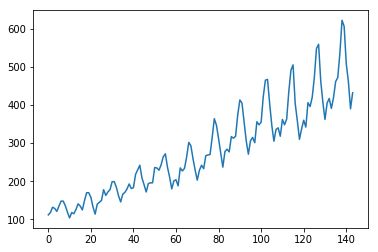

In [17]:
import pandas
import matplotlib.pyplot as plt
import math
dataset = pandas.read_csv("international-airline-passengers.csv",usecols = [1], engine = 'python', skipfooter = 3)
plt.plot(dataset)
plt.show()

In [3]:
#Import all required libraries
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

/Users/saraswathy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/saraswathy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [5]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# 2. Analyze the dataset

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# 3. Fit the model

In [20]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 51563.2472
Epoch 2/200
 - 0s - loss: 33281.2359
Epoch 3/200
 - 0s - loss: 20284.8245
Epoch 4/200
 - 0s - loss: 11414.7710
Epoch 5/200
 - 0s - loss: 5925.6311
Epoch 6/200
 - 0s - loss: 2893.2561
Epoch 7/200
 - 0s - loss: 1469.8050
Epoch 8/200
 - 0s - loss: 860.6926
Epoch 9/200
 - 0s - loss: 636.6664
Epoch 10/200
 - 0s - loss: 561.6343
Epoch 11/200
 - 0s - loss: 542.5062
Epoch 12/200
 - 0s - loss: 538.1345
Epoch 13/200
 - 0s - loss: 535.9930
Epoch 14/200
 - 0s - loss: 536.5604
Epoch 15/200
 - 0s - loss: 539.3492
Epoch 16/200
 - 0s - loss: 537.8540
Epoch 17/200
 - 0s - loss: 539.4596
Epoch 18/200
 - 0s - loss: 541.3940
Epoch 19/200
 - 0s - loss: 539.1883
Epoch 20/200
 - 0s - loss: 543.0469
Epoch 21/200
 - 0s - loss: 540.6975
Epoch 22/200
 - 0s - loss: 537.6420
Epoch 23/200
 - 0s - loss: 546.3171
Epoch 24/200
 - 0s - loss: 541.7868
Epoch 25/200
 - 0s - loss: 540.3929
Epoch 26/200
 - 0s - loss: 537.6007
Epoch 27/200
 - 0s - loss: 536.0575
Epoch 28/200
 - 0s - loss:

In [21]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 528.92 MSE (23.00 RMSE)
Test Score: 2347.31 MSE (48.45 RMSE)


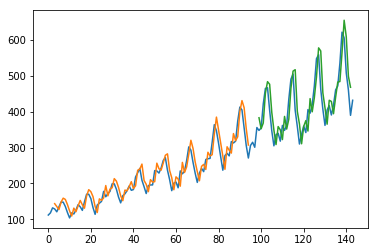

In [30]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 4. Changing the parameters

Epoch 1/400
 - 0s - loss: 55834.5044
Epoch 2/400
 - 0s - loss: 35407.5706
Epoch 3/400
 - 0s - loss: 22827.3964
Epoch 4/400
 - 0s - loss: 12177.9012
Epoch 5/400
 - 0s - loss: 5331.0649
Epoch 6/400
 - 0s - loss: 2149.6083
Epoch 7/400
 - 0s - loss: 1237.9796
Epoch 8/400
 - 0s - loss: 1094.8637
Epoch 9/400
 - 0s - loss: 1072.2191
Epoch 10/400
 - 0s - loss: 1062.9887
Epoch 11/400
 - 0s - loss: 1049.2963
Epoch 12/400
 - 0s - loss: 1057.6335
Epoch 13/400
 - 0s - loss: 1052.6032
Epoch 14/400
 - 0s - loss: 1047.1745
Epoch 15/400
 - 0s - loss: 1045.6013
Epoch 16/400
 - 0s - loss: 1037.5890
Epoch 17/400
 - 0s - loss: 1044.7805
Epoch 18/400
 - 0s - loss: 1042.4018
Epoch 19/400
 - 0s - loss: 1078.4199
Epoch 20/400
 - 0s - loss: 1047.1158
Epoch 21/400
 - 0s - loss: 1032.1577
Epoch 22/400
 - 0s - loss: 1047.0380
Epoch 23/400
 - 0s - loss: 1062.2606
Epoch 24/400
 - 0s - loss: 1020.9621
Epoch 25/400
 - 0s - loss: 1015.8889
Epoch 26/400
 - 0s - loss: 1022.6235
Epoch 27/400
 - 0s - loss: 998.4232
Epoch 2

Epoch 225/400
 - 0s - loss: 540.8474
Epoch 226/400
 - 0s - loss: 533.7024
Epoch 227/400
 - 0s - loss: 570.0734
Epoch 228/400
 - 0s - loss: 537.4151
Epoch 229/400
 - 0s - loss: 531.8496
Epoch 230/400
 - 0s - loss: 544.3373
Epoch 231/400
 - 0s - loss: 579.6755
Epoch 232/400
 - 0s - loss: 551.4022
Epoch 233/400
 - 0s - loss: 525.3797
Epoch 234/400
 - 0s - loss: 503.2547
Epoch 235/400
 - 0s - loss: 537.0337
Epoch 236/400
 - 0s - loss: 555.7236
Epoch 237/400
 - 0s - loss: 576.5064
Epoch 238/400
 - 0s - loss: 535.7372
Epoch 239/400
 - 0s - loss: 512.2739
Epoch 240/400
 - 0s - loss: 523.8064
Epoch 241/400
 - 0s - loss: 521.0973
Epoch 242/400
 - 0s - loss: 525.1185
Epoch 243/400
 - 0s - loss: 518.6352
Epoch 244/400
 - 0s - loss: 517.5163
Epoch 245/400
 - 0s - loss: 510.6361
Epoch 246/400
 - 0s - loss: 546.1340
Epoch 247/400
 - 0s - loss: 536.3983
Epoch 248/400
 - 0s - loss: 531.8552
Epoch 249/400
 - 0s - loss: 517.1275
Epoch 250/400
 - 0s - loss: 523.2590
Epoch 251/400
 - 0s - loss: 520.4340
E

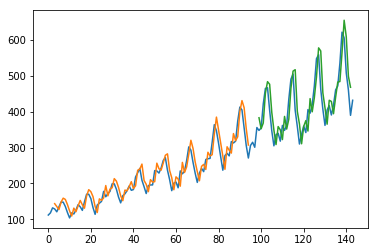

In [28]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
 
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

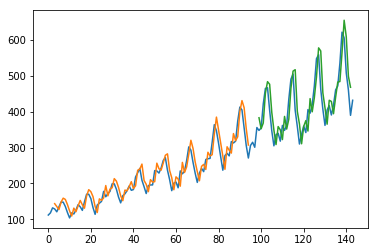

In [29]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()